In [1]:
import  torch
from    matplotlib  import  pyplot  as  plt

from    sys         import  path
from    pathlib     import  Path
path.append(str(Path.cwd().parent))
from    deep_numerical.utils                    import  *
from    deep_numerical.numerical.distribution   import  *
from    train_utils.train_utils     import  *

In [ ]:
# alpha = torch.linspace(0,1,5)
alpha = [0.0]
values, info = load_data(rf"/media/junseung/47a90e46-3a9d-467c-bbee-066752b68532/GWANGJAE/datasets_kinetic/Boltzmann_2D/biMaxwellian/coeff1.59e-01/res032/", resolution=32, alpha=alpha, part_index=range(1,4))

In [3]:
data = values['data']
data = data[:, :, None, None, ...]

v_grid = velocity_grid(2, 32, 3/LAMBDA)
equi = maxwellian_homogeneous(v_grid, *compute_moments_homogeneous(data[:,0], v_grid))

In [4]:
tensor1 = data.reshape((180*51*len(alpha), *data.shape[2:]))
tensor2 = equi[:, None, ...].repeat((1,51, 1, 1, 1, 1, 1)).reshape((180*51*len(alpha), *data.shape[2:]))
deviance = relative_error(tensor1, tensor2)
print(deviance.shape)

torch.Size([18360])


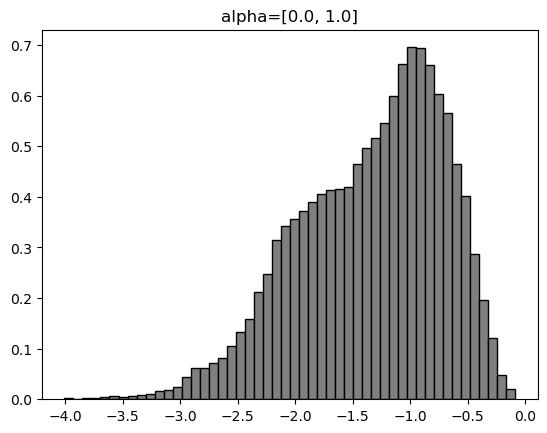

In [5]:
plt.title(f"{alpha=}")
plt.hist(deviance.flatten().log10(), bins=50, density=True, color='gray', edgecolor='black')
plt.show()